# AIM 5001 Project 4 (Week 13)
## Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis
### Data Acquisition and Preparation
According to the introduction of the dataset, the mushroom dataset contains 8124 observations and 22 attributes. Some general science education books for children said, the more beautiful the mushrooms are, the more poisonous they might be, while the more plain they look, the more likely they are not poisonous. Sometimes, the rings also matter. Therefore in this project, the mushroom cap surface, cap color, odor and ring numbers will be selected for further research.

In [1]:
# import related libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
# read the original data as dataframe
data=pd.read_csv('https://raw.githubusercontent.com/chenkecoco1/AIM-5001/master/agaricus-lepiota.data', header=None)
# check if successfully done
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


Select the columns cap surface, cap color, odor and ring numbers and if it is edible to create a data_sub dataframe for further use.

In [2]:
# select  mushroom cap surface, cap color, odor and ring numbers as well as the first column "edible or poisonous" to the subset
# the corresponding column numbers are 0,2,3,5,18
data_sub = data.iloc[:, [0, 2, 3, 5, 18]].copy()
# rename the column names
data_sub.columns=['Edible', 'Cap_Surface', 'Cap_Color', 'Odor', 'Ring_Numbers']
# check new subset
data_sub.head()

,Edible,Cap_Surface,Cap_Color,Odor,Ring_Numbers
0,p,s,n,p,o
1,e,s,y,a,o
2,e,s,w,l,o
3,p,y,w,p,o
4,e,s,g,n,o


According to the original data introduction https://archive.ics.uci.edu/ml/datasets/mushroom, the letter meanings are 
* For cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
* For cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
* For odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
* For ring numbers: none=n, one=o, two=t

Conversion will be made in the following way: "e" (edible) will be substitute by 0, and "p" (poisonous) will be converted to 1. Dummy variables will be created for other columns with get_dummies() method for further use. The binary indicators 0 and 1 means false and true respectively.

In [3]:
# convert edible and poisonous as 0 and 1
data_sub['Edible'].replace('e',0, inplace = True)
data_sub['Edible'].replace('p',1, inplace = True)
# dummy the other columns and combine the tables
data_sub_d = pd.get_dummies(data_sub,columns=['Cap_Surface','Cap_Color', 'Odor', 'Ring_Numbers'])
data_sub_d.head()

,Edible,Cap_Surface_f,Cap_Surface_g,Cap_Surface_s,Cap_Surface_y,Cap_Color_b,Cap_Color_c,Cap_Color_e,Cap_Color_g,Cap_Color_n,...,Odor_f,Odor_l,Odor_m,Odor_n,Odor_p,Odor_s,Odor_y,Ring_Numbers_n,Ring_Numbers_o,Ring_Numbers_t
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


### Exploratory Data Analysis
The null values will be checked for the selected columns as below:

In [4]:
# check if null values existing 
data_sub.isnull().sum()

Edible          0
Cap_Surface     0
Cap_Color       0
Odor            0
Ring_Numbers    0
dtype: int64

According to the result, there is no null values in the selected columns. Therefore, the dummied dataframe will be the same as the original data_sub dataframe, which is easier to manipulate later. <br>
<br>
A general view of the dataframe will be seen through .describe()

In [5]:
# set the list of column names for statistical data getting
column_list=['Edible','Cap_Surface', 'Cap_Color', 'Odor', 'Ring_Numbers']
for i in range(5):
    a=data_sub[column_list[i]].describe()
    print(a)
    print('-----------')

count    8124.000000
mean        0.482029
std         0.499708
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Edible, dtype: float64
-----------
count     8124
unique       4
top          y
freq      3244
Name: Cap_Surface, dtype: object
-----------
count     8124
unique      10
top          n
freq      2284
Name: Cap_Color, dtype: object
-----------
count     8124
unique       9
top          n
freq      3528
Name: Odor, dtype: object
-----------
count     8124
unique       3
top          o
freq      7488
Name: Ring_Numbers, dtype: object
-----------


Bar plots will be created to examine the frequency of each category.

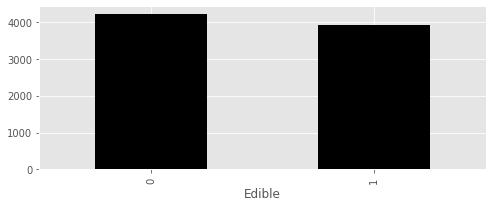

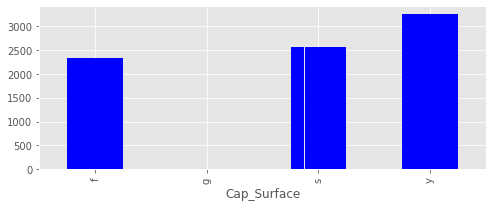

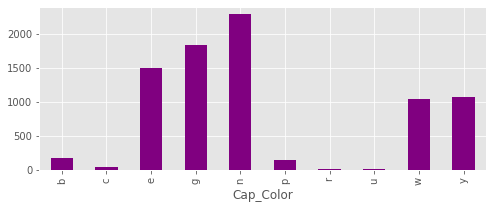

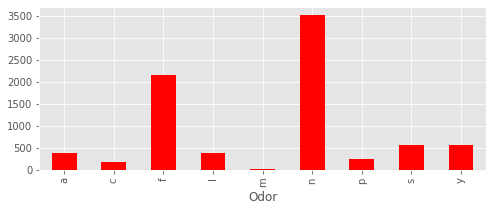

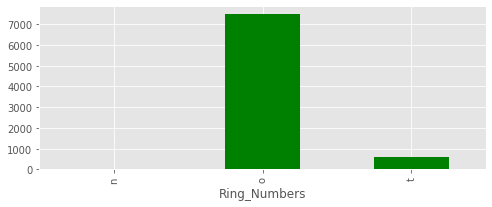

In [6]:
# set the list of column names for ploting one by one
color_list=['black','blue','purple','red','green']
column_list=['Edible','Cap_Surface', 'Cap_Color', 'Odor', 'Ring_Numbers']
# apply ggplot style
plt.style.use('ggplot')
# create the barplot one by one
for i in range(5):
    data_sub.groupby(column_list[i]).count().plot.bar(figsize=(8,3), color=color_list[i],legend=False)

According to the bar plots above:
* Edible mushrooms (with value 0) frequency is a little bit more than the poisonous mushrooms. 
* For the mushroom cap surface, smooth surface type has the most counts, fibrous and scaly surface types is a little bit less than smooth type, while grooves type has the least counts, which is even barely seen in the graph.
* Mushroom with cap colors red, gray and brown have the top 3 observations, while green, purple and cinnamon are the bottom 3. 
* Mushrooms without odor has the most observations with around 3500 counts. Musty odor is the type most rarely.
* More than 7000 observed mushrooms have 1 ring, and less than 1000 mushrooms have 2 rings. Very few mushrooms have no rings.

In [7]:
# investigate the hardly seen types with the dummied dataframe
[data_sub_d.Cap_Surface_g.sum(),data_sub_d.Ring_Numbers_n.sum()]

[4, 36]

There is only 4 observations having cap grooves surface and 36 observations having no rings.

## Phase II: Build Predictive Models
In this part, the table added dummy data in Phase I will be used for logistic regression. 

In [8]:
# import train_test_split for spliting the data into training and testing 
from sklearn.model_selection import train_test_split
# import LogisticRegression 
from sklearn.linear_model import LogisticRegression

To determine which of the predictor columns selected most accurately predicts whether a mushroom is poisonous, the data will be split based on the predictor to training and testing sets.

In [11]:
# X for explanatory variables, y for response variable,
X_surface=data_sub_d.iloc[:,1:5] 
X_color=data_sub_d.iloc[:,5:15] 
X_odor=data_sub_d.iloc[:,15:24] 
X_rings=data_sub_d.iloc[:,24:] 
y = data_sub_d.iloc[:,0]

# split data as training data and testing data of each 
X_surface_train, X_surface_test, y_train, y_test = train_test_split(X_surface, y, random_state=0)
X_color_train, X_color_test, y_train, y_test = train_test_split(X_color, y, random_state=0)
X_odor_train, X_odor_test, y_train, y_test = train_test_split(X_odor, y, random_state=0)
X_rings_train, X_rings_test, y_train, y_test = train_test_split(X_rings, y, random_state=0)

Check the poisonous percentage of training mushrooms by calculating how many records in the training data set and testing data set. The accuracy needs to exceed the null error rate. 

In [13]:
# the percentage of poisonous mushrooms in the training set, take any training set as the row numbers are the same.
poi_percent=y_train.values.sum()/X_surface_train.shape[0]
# count the null error rate
1-poi_percent

0.516494337764648

Apply logistic regression on each training set.

In [14]:
# using LogisticRegression() for model_surface
model_surface = LogisticRegression()
# fit the logistic regression to the cap surface training set
model_surface.fit(X_surface_train, y_train)

# using LogisticRegression() for model_color
model_color = LogisticRegression()
# fit the logistic regression to the cap color training set
model_color.fit(X_color_train, y_train)

# using LogisticRegression() for model_odor
model_odor = LogisticRegression()
# fit the logistic regression to the odor training set
model_odor.fit(X_odor_train, y_train)

# using LogisticRegression() for model_rings
model_rings = LogisticRegression()
# fit the logistic regression to the number of rings training set
model_rings.fit(X_rings_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# calculate the accuracy of each model relative to the training data set
[model_surface.score(X_surface_train, y_train),model_color.score(X_color_train, y_train),
 model_odor.score(X_odor_train, y_train),model_rings.score(X_rings_train, y_train)]

[0.5824716888232397, 0.5918266863613983, 0.9847365829640571, 0.54045626128344]

Comparing to the null error rate above, all the four models accuracy are higher than 0.516, which mean the models are all useful. Among the four models, odor model has the highest accuracy, 0.985, while number of rings has the lowest accuracy, 0.540. The model of cap surface and cap color has the similar accuracy, which are slightly less than 0.60.

In [16]:
# calculate the accuracy of each model relative to the test data set
[model_surface.score(X_surface_test, y_test),model_color.score(X_color_test, y_test),
 model_odor.score(X_odor_test, y_test),model_rings.score(X_rings_test, y_test)]

[0.5745937961595273,
 0.6056129985228951,
 0.9867060561299852,
 0.5312653865091088]

The accuracy of odor model is the same, while the number of rings model perform worse than the training set.

In [17]:
# check the coefficent of each model
[model_surface.coef_,model_color.coef_,model_odor.coef_,model_rings.coef_]

[array([[-0.92704659,  0.95517361,  0.03469824, -0.06378418]]),
 array([[ 1.19812506, -0.57719202,  0.73503835,  0.16516418,  0.19211217,
          0.77619684, -1.52493476, -1.52493476, -0.35850596,  0.91913754]]),
 array([[-5.67623859,  2.31258867,  4.15170232, -5.74837734,  1.25215044,
         -5.07297676,  2.55357693,  3.10477045,  3.12242404]]),
 array([[ 2.25726632, -0.13455538, -2.12269649]])]

* Cap surface: The fibrous and scaly surface mushrooms are more likely to be edible, while grooves and smooth surface increase the possibility to be poisonous.
* Cap color: More likely poisonous colors are buff, red, gray, brown and yellow. More likely edible colors are cinnamon, green, pink, purple and white.
* Odor: Mushrooms with almond anise or no odor are likely to be edible, while creosote, fishy, foul, musty, pungent, or spicy odor are more likely to be poisonous.
* Ring numbers: None ring mushrooms are more likely to be poisonous, while rings decrease the possibility to be poisonous of mushrooms.

### Conclusion
I. Among all the four predictor columns, odor most accurately predicts if the mushroom is poisonous.<br>
II. The accuracy of number of rings model has the worst performance for mushroom poisonous prediction, therefore it can be put on the waiting list of the predictor candidates, rather than determined.<br>
III. For further analysis, more than 1 predictors can be taken into consideration together to train the model to fix the final model and improve the accuracy of the model.


## References and Tutorials

https://datascienceplus.com/building-a-logistic-regression-in-python-step-by-step/ <br>
https://nbviewer.jupyter.org/gist/justmarkham/6d5c061ca5aee67c4316471f8c2ae976 <br>
https://datascienceomar.wordpress.com/2016/07/19/3-examples-of-logistic-regression-sci-kit-learn/